In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D
import matplotlib.pyplot as pltcifar10_data
from keras.datasets import mnist
from keras.utils import to_categorical
import h5py
import numpy as np

Using TensorFlow backend.


In [0]:
import zipfile
         
fantasy_zip = zipfile.ZipFile('/content/drive/My Drive/Proyecto DeepLearning/Reciclaje.zip')
fantasy_zip.extractall('/content/drive/My Drive/Proyecto DeepLearning/')

In [0]:
from PIL import Image
from sklearn.utils import shuffle
import numpy as np
import h5py
import os
import glob
import librosa


classes_id={
              'Aluminium Recyclable':0,
              'Banana Organic':1,
              'Battery Recyclable':2,
              'Glass Recyclable':3,
              'Paper Recyclable':4,
              'Plastic Recyclable':5,
          }
def label2num(x):
    if x in classes_id:
        return classes_id[x]
    else:
        return(16)
parent_dir = "/content/drive/My Drive/Proyecto DeepLearning/"
file_ext = "*.jpg"
imgs = []
labels = []
imSize = 128
for sub_dir in os.listdir(parent_dir):
    print(sub_dir)
    etiqueta = sub_dir
    lbl = label2num(etiqueta)
    for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
      try:  
        img = Image.open(fn)
        if (img.size[0] >= 0):
            img=img.resize((imSize,imSize),Image.ANTIALIAS)
            im=np.array(img)
            imgs.append(im)
            labels.append(lbl)
      except:
        print(fn)
imgs = np.asarray(imgs).reshape(len(imgs),imSize,imSize,3)
labels = np.asarray(labels)
#Mesclar aleatoriamente la base de datos
x1, y1 = shuffle(imgs, labels)

# O Separarla en entrenamieto y prueba (o si es necesario en validación)
samples=y1.size
y1=y1.reshape((samples,1))

offset = int(x1.shape[0] * 0.80)
X_train, Y_train = x1[:offset], y1[:offset]
X_test, Y_test = x1[offset:], y1[offset:]
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)
# Se puede adicionar el proceso que requieran para su base de datos

# Este sería el proceso para guardar en un formato h5 los datos
with h5py.File('/content/drive/My Drive/Proyecto DeepLearning/train_dataset.h5','w') as h5data:
    h5data.create_dataset('train_set_x',data=X_train)
    h5data.create_dataset('train_set_y',data=Y_train)
with h5py.File('/content/drive/My Drive/Proyecto DeepLearning/test_dataset.h5','w') as h5data:
    h5data.create_dataset('test_set_x',data=X_test)
    h5data.create_dataset('test_set_y',data=Y_test)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

.ipynb_checkpoints
my_model.h5
my_model2.h5
Aluminium Recyclable
Battery Recyclable
Glass Recyclable
Paper Recyclable
Plastic Recyclable
test_dataset2modelos.h5
train_dataset2modelos.h5
Banana Organic
train_dataset1dimension.h5
test_dataset1dimension.h5
my_model3.h5
my_model4.h5
(4172, 128, 128, 3)
(1043, 128, 128, 3)
(4172, 1)
(1043, 1)


X Shape =  (128, 128, 3)
Y Shape =  [1. 0. 0. 0. 0. 0.]


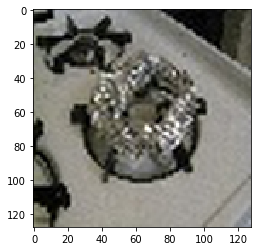

In [3]:

import cv2
def resize_np (np_array,shape):
    resized=[]
    for i in list(np_array):
        larger=cv2.resize(i,(shape,shape))
        resized.append(np.array(larger))
    return (np.array(resized).astype(np.float32))


def load_data(n_classes,shape,folder,name,i):
    with h5py.File((folder+name+i+'.h5'),'r') as h5data:
        ls=list(h5data.keys())
#         print(ls)
        data=np.array(h5data.get(ls[0])[:])
        Y=np.array(h5data.get(ls[1])[:])
    
    X=resize_np(data,shape)
    #X=np.expand_dims(X, axis=-1)
     #mostrar un ejemplo
    plt.imshow(X[0].astype(int))
    im_shape=X[0].shape
    return (X/255,Y,im_shape)


num_train_files=2 # Número de archivos H5
folder='/content/drive/My Drive/Proyecto DeepLearning/'
train_name='train_dataset'
test_name='test_dataset'
n_classes = 6 # total classes
shape = 128 # data input shape

# Parametros de entrenamiento
tf.set_random_seed(1)
learning_rate = 0.005
training_epochs = 180
batch_size = 16



#Cargar la base de datos limitando el tamaño de las imágenes
X_test,Y_test,im_shape=load_data(n_classes,shape,folder,test_name,'')
X_train,Y_train,im_shape=load_data(n_classes,shape,folder,train_name,'')

#check image shape
print ("X Shape = ", X_train[0].shape)

#one-hot encode target column
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print ("Y Shape = ", Y_train[0])

In [0]:
#create model
#model = Sequential()
#add model layers
#model.add(Conv2D(64, kernel_size=5, activation="relu", strides=(1, 1), input_shape=(im_shape[0],im_shape[1],im_shape[2])))
#model.add(Conv2D(64, kernel_size=5, activation="relu",strides= (1, 1),input_shape=(im_shape[0],im_shape[1],im_shape[2])))
#model.add(Conv2D(64, kernel_size=5, activation="relu",strides= (1, 1),input_shape=(im_shape[0],im_shape[1],im_shape[2])))3
#model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#model.add(Conv2D(64, kernel_size=5, activation="relu", strides=(1, 1), input_shape=(im_shape[0],im_shape[1],im_shape[2])))
#model.add(Conv2D(64, kernel_size=5, activation="relu",strides= (1, 1),input_shape=(im_shape[0],im_shape[1],im_shape[2])))
#model.add(Conv2D(64, kernel_size=5, activation="relu",strides= (1, 1),input_shape=(im_shape[0],im_shape[1],im_shape[2])))
#model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#model.add(Conv2D(64, kernel_size=5, activation="relu"))
#model.add(Flatten())
#model.add(Dense(6, activation="softmax"))

#-----------------------------------------------------------------------Modelo 2
#from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
  
#model = Sequential()
#model.add(Conv2D(33, (3, 3), padding='same', activation='relu', input_shape=(im_shape[0],im_shape[1],im_shape[2])))
#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
  
#model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
  
#model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))


  
#model.add(Flatten())
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(6, activation='softmax'))
#-----------------------------------------------------------------------Modelo 3 actual 
model = Sequential()
model.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (im_shape[0], im_shape[1], 3)))
model.add(Dropout(0.4))
model.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(6, activation = "softmax"))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64, 64, 64)       

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model.fit(X_train,  Y_train, validation_data=(X_test, Y_test), epochs=15)
#predict first 4 images in the test set
print(model.predict(X_test[:4]))
#actual results for first 4 images in test set
print(Y_test[:4])

Train on 4172 samples, validate on 1043 samples
Epoch 1/15
4172/4172 [==============================] - 517s 124ms/step - loss: 0.2922 - acc: 0.8929 - val_loss: 1.3650 - val_acc: 0.5407
Epoch 2/15
4172/4172 [==============================] - 516s 124ms/step - loss: 0.2285 - acc: 0.9161 - val_loss: 1.4727 - val_acc: 0.5570
Epoch 3/15
4172/4172 [==============================] - 510s 122ms/step - loss: 0.2230 - acc: 0.9190 - val_loss: 1.2859 - val_acc: 0.5839
Epoch 4/15
4172/4172 [==============================] - 506s 121ms/step - loss: 0.2887 - acc: 0.9003 - val_loss: 1.3065 - val_acc: 0.5475
Epoch 5/15
4172/4172 [==============================] - 507s 122ms/step - loss: 0.2117 - acc: 0.9221 - val_loss: 1.3551 - val_acc: 0.5599
Epoch 6/15
4172/4172 [==============================] - 517s 124ms/step - loss: 0.2035 - acc: 0.9302 - val_loss: 1.5450 - val_acc: 0.5360
Epoch 7/15
4172/4172 [==============================] - 511s 122ms/step - loss: 0.2494 - acc: 0.9159 - val_loss: 1.4010 - va

In [0]:
print(model.predict(X_test[:10]))
#actual results for first 4 images in test set
print(Y_test[:10])

[[1.15404829e-01 1.98520742e-10 4.33657988e-06 1.15210460e-04
  2.32629403e-02 8.61212730e-01]
 [1.66939218e-02 7.08984317e-06 2.15884847e-05 3.10211530e-04
  7.07937539e-01 2.75029719e-01]
 [4.17251336e-08 3.10803583e-09 2.54298720e-06 9.00821745e-01
  9.71853510e-02 1.99027406e-03]
 [6.02740038e-05 3.45869722e-07 2.07425473e-04 8.89682412e-01
  4.88950491e-07 1.10049024e-01]
 [1.23294825e-07 9.74914932e-15 2.54529118e-06 9.06296730e-01
  1.34002830e-05 9.36871842e-02]
 [1.83317898e-05 2.94565199e-18 5.78941617e-10 4.11095698e-06
  4.45493715e-05 9.99933004e-01]
 [9.99365151e-01 3.33795630e-11 3.63002570e-08 4.66159283e-04
  1.66937971e-04 1.82507063e-06]
 [5.10961065e-13 8.72262603e-14 6.89089341e-10 9.99999523e-01
  1.00328433e-10 4.66422449e-07]
 [1.61868774e-09 1.23043645e-10 2.04896537e-06 8.60568285e-01
  1.01369926e-06 1.39428675e-01]
 [5.61418012e-03 2.52695208e-05 1.75920533e-04 5.57569321e-04
  9.38557982e-01 5.50690778e-02]]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0.

In [0]:

#Con esto se guarda el modelo actual con  el accuracy actual 
#from keras.models import load_model

#model.save('/content/drive/My Drive/Proyecto DeepLearning/my_model5.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

In [7]:

#Con esto se carga el modelo guardado
from keras.models import load_model
model = load_model('/content/drive/My Drive/Proyecto DeepLearning/my_model5.h5')

In [0]:
print(model.predict(X_test[:4]))

[[5.8327514e-01 2.9815178e-04 5.9786323e-02 1.6365373e-01 1.8010244e-01
  1.2884251e-02]
 [3.1556224e-03 2.9476714e-06 1.7854227e-05 6.6196904e-02 9.3047553e-01
  1.5123458e-04]
 [7.7196318e-01 3.9520683e-06 1.8879083e-01 3.8828790e-02 1.4942548e-04
  2.6377896e-04]
 [1.6757032e-01 3.7099239e-03 1.6910747e-01 6.0104555e-01 4.1088916e-02
  1.7477769e-02]]


In [9]:
#Con esto probamos el modelo con una imagen nueva

from keras.models import load_model
from keras.preprocessing import image
import numpy as np


Labels=['Aluminium Recyclable','Banana Organic','Battery Recyclable','Glass Recyclable','Paper Recyclable','Plastic Recyclable']
# dimensions of our images    -----   are these then grayscale (black and white)?
img_width, img_height,channels = 128, 128,3

# load the model we saved
#model = load_model('model.h5')

# Get test image ready
test_image = image.load_img('/content/drive/My Drive/Proyecto DeepLearning/Aluminium Recyclable/Aluminio1009.jpg', target_size=(128, 128, 3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

test_image = test_image.reshape(-1,img_width, img_height,3)    # Ambiguity!
# Should this instead be: test_image.reshape(img_width, img_height, 3) ??

result = model.predict(test_image, batch_size=1)
Prediction=result.argmax()
print(Labels[Prediction])
print (result)

Aluminium Recyclable
[[1. 0. 0. 0. 0. 0.]]
